# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_count = 0
set_count = 1

print('Beginning Data Retrieval ')
print('-----------------------------')

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
retrieval_url = f'{base_url}appid={weather_api_key}&units={units}&q='


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(retrieval_url + city).json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if index_count > 49:
            index_count = 0
            set_count = set_count + 1
    
        else:
            index_count = index_count + 1
            
        print(f'Processing Record {index_count} of Set {set_count} : {city}') 
  
    except(KeyError, IndexError):
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : rikitea
Processing Record 2 of Set 1 : topi
Processing Record 3 of Set 1 : kapaa
Processing Record 4 of Set 1 : saskylakh
Processing Record 5 of Set 1 : walvis bay
Processing Record 6 of Set 1 : kodiak
Processing Record 7 of Set 1 : busselton
Processing Record 8 of Set 1 : kahului
Processing Record 9 of Set 1 : victoria
Processing Record 10 of Set 1 : kaitangata
Processing Record 11 of Set 1 : chokurdakh
Processing Record 12 of Set 1 : moyale
Processing Record 13 of Set 1 : boa vista
City not found. Skipping...
Processing Record 14 of Set 1 : mahebourg
Processing Record 15 of Set 1 : martos
Processing Record 16 of Set 1 : khatanga
Processing Record 17 of Set 1 : huaihua
Processing Record 18 of Set 1 : isabela
Processing Record 19 of Set 1 : chistoye
City not found. Skipping...
Processing Record 20 of Set 1 : cheney
Processing Record 21 of Set 1 : atuona
Processing Record 22 of Set 1 : kavieng
Process

City not found. Skipping...
Processing Record 33 of Set 4 : santa elena
Processing Record 34 of Set 4 : kabo
Processing Record 35 of Set 4 : ilo
Processing Record 36 of Set 4 : yanam
Processing Record 37 of Set 4 : east london
Processing Record 38 of Set 4 : boende
Processing Record 39 of Set 4 : kurilsk
Processing Record 40 of Set 4 : martinsville
Processing Record 41 of Set 4 : djougou
Processing Record 42 of Set 4 : carutapera
Processing Record 43 of Set 4 : goderich
City not found. Skipping...
Processing Record 44 of Set 4 : kaga
City not found. Skipping...
Processing Record 45 of Set 4 : mar del plata
Processing Record 46 of Set 4 : the valley
Processing Record 47 of Set 4 : zlitan
Processing Record 48 of Set 4 : vestmannaeyjar
City not found. Skipping...
Processing Record 49 of Set 4 : pitsunda
City not found. Skipping...
Processing Record 50 of Set 4 : tuktoyaktuk
Processing Record 0 of Set 5 : ketchikan
Processing Record 1 of Set 5 : lonevag
Processing Record 2 of Set 5 : carau

Processing Record 22 of Set 8 : general roca
Processing Record 23 of Set 8 : pori
Processing Record 24 of Set 8 : pochutla
Processing Record 25 of Set 8 : samoylovka
Processing Record 26 of Set 8 : paragominas
Processing Record 27 of Set 8 : yarada
Processing Record 28 of Set 8 : karbinci
Processing Record 29 of Set 8 : ponta do sol
City not found. Skipping...
Processing Record 30 of Set 8 : saint-francois
Processing Record 31 of Set 8 : ghorawal
Processing Record 32 of Set 8 : petropavlovsk-kamchatskiy
Processing Record 33 of Set 8 : lieksa
Processing Record 34 of Set 8 : ust-tsilma
Processing Record 35 of Set 8 : foxton
Processing Record 36 of Set 8 : coolum beach
Processing Record 37 of Set 8 : cam ranh
City not found. Skipping...
Processing Record 38 of Set 8 : manitouwadge
Processing Record 39 of Set 8 : kunya
Processing Record 40 of Set 8 : catamarca
City not found. Skipping...
Processing Record 41 of Set 8 : hargeysa
Processing Record 42 of Set 8 : minudasht
Processing Record 43

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#build dataframe
weather_df = pd.DataFrame({
    'City' : city_name,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity': humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date': date,
    
})

#export to csv
weather_df.to_csv('output_data/cities.csv', index = False)

#display dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.83,69,67,7.63,PF,1611949118
1,Topi,34.0704,72.6236,48.00,58,0,6.02,PK,1611949118
2,Kapaa,22.0752,-159.3190,73.99,78,75,20.71,US,1611949118
3,Saskylakh,71.9167,114.0833,-38.90,79,79,2.04,RU,1611949118
4,Walvis Bay,-22.9575,14.5053,66.99,77,100,8.05,NA,1611948624
...,...,...,...,...,...,...,...,...,...
550,Guaratinguetá,-22.8164,-45.1925,95.00,36,40,6.91,BR,1611949220
551,Zarubino,42.6300,131.0922,2.55,85,100,8.46,RU,1611949220
552,Namatanai,-3.6667,152.4333,80.98,84,68,11.16,PG,1611948698
553,Nānākuli,21.3906,-158.1547,73.40,73,75,8.05,US,1611949220


In [5]:
#summary stats for dataframe
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.925191,20.544487,49.537207,70.832432,49.947748,8.471946,1.611949e+09
std,32.993646,90.636639,32.763824,21.059886,40.014697,5.882278,1.643327e+02
min,-54.800000,-175.200000,-47.360000,10.000000,0.000000,0.250000,1.611948e+09
25%,-8.556300,-60.556050,30.100000,58.500000,1.000000,3.960000,1.611949e+09
50%,24.783300,25.850000,59.920000,77.000000,50.000000,7.450000,1.611949e+09
75%,45.480450,102.272600,75.550000,86.500000,90.000000,11.500000,1.611949e+09
max,78.218600,179.316700,100.000000,100.000000,100.000000,39.120000,1.611949e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#n/a no data with >100% humidity see above 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

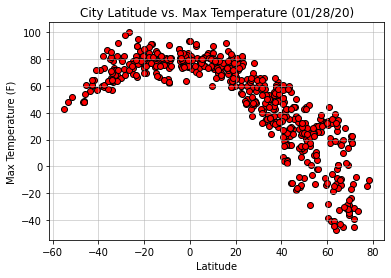

In [7]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], facecolor = 'red', edgecolor = 'black')

#title
plt.title('City Latitude vs. Max Temperature (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Max Temperature (F)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city__latitude_vs_max_temperature.png')

## Latitude vs. Humidity Plot

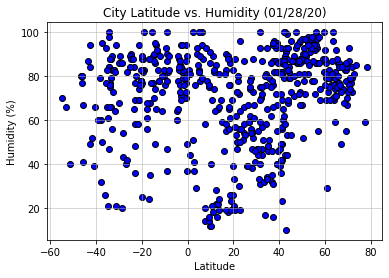

In [8]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'], facecolor = 'blue', edgecolor = 'black')

#title
plt.title('City Latitude vs. Humidity (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Humidity (%)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city_latitude_vs_humidity.png')

## Latitude vs. Cloudiness Plot

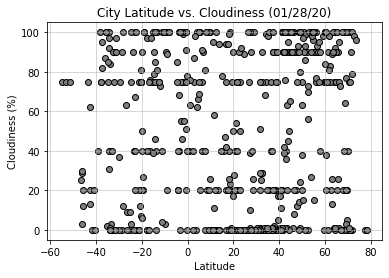

In [9]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], facecolor = 'gray', edgecolor = 'black')

#title
plt.title('City Latitude vs. Cloudiness (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Cloudiness (%)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city_latitude_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

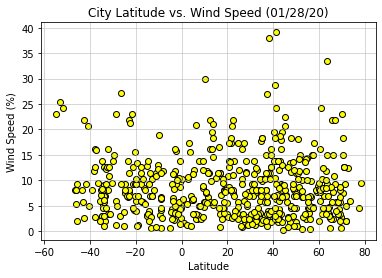

In [10]:
#create scater plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], facecolor = 'yellow', edgecolor = 'black')

#title
plt.title('City Latitude vs. Wind Speed (01/28/20)')

#x axis label
plt.xlabel('Latitude')

#y axis label
plt.ylabel('Wind Speed (%)')

#set gid
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

#export as png
plt.savefig('output_data/city_latitude_vs_Wind Speed.png')

## Linear Regression

In [11]:
#northern & southern dataframes
northern_hem = weather_df.loc[weather_df['Lat']>= 0]
southern_hem = weather_df.loc[weather_df['Lat']<= 0]

#functions for linear regression
def linear_regression(x,y):
    print(f'the r-value is: {round(st.pearsonr(x,y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = 'y =' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values, 'r-')
    return line_eq

#function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b), fontsize = 15, color='orange')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: -0.86


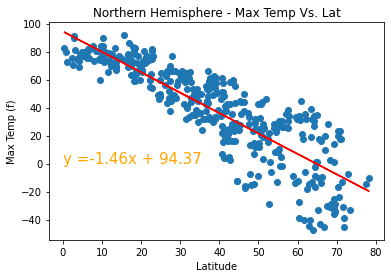

In [12]:
equation = linear_regression(northern_hem['Lat'], northern_hem['Max Temp'])

annotate(equation, 0, 0)

plt.title('Northern Hemisphere - Max Temp Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/northern_hemisphere_max_temp_vs_Lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.58


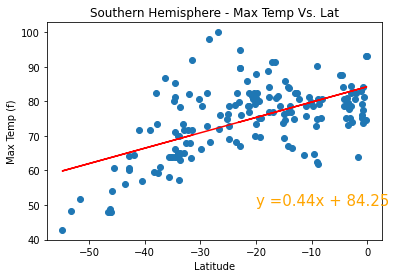

In [13]:
equation = linear_regression(southern_hem['Lat'], southern_hem['Max Temp'])

annotate(equation, -20, 50)

plt.title('Southern Hemisphere - Max Temp Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/southern_hemisphere_max_temp_vs_Lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.37


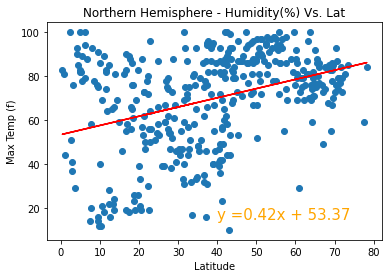

In [14]:
equation = linear_regression(northern_hem['Lat'], northern_hem['Humidity'])

annotate(equation, 40, 15)

plt.title('Northern Hemisphere - Humidity(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/northern_hemisphere_humidity_vs_Lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.19


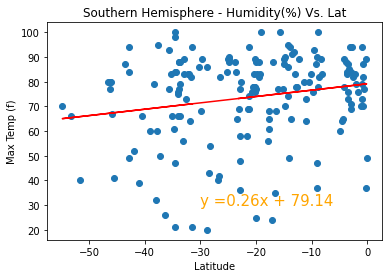

In [15]:
equation = linear_regression(southern_hem['Lat'], southern_hem['Humidity'])

annotate(equation, -30, 30)

plt.title('Southern Hemisphere - Humidity(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/southern_hemisphere_humidity_vs_Lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.19


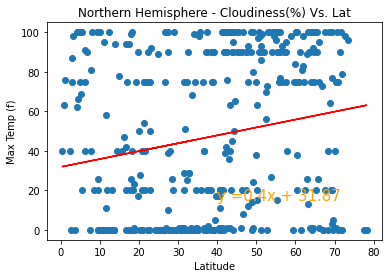

In [16]:
equation = linear_regression(northern_hem['Lat'], northern_hem['Cloudiness'])

annotate(equation, 40, 15)

plt.title('Northern Hemisphere - Cloudiness(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/northern_hemisphere_cloudiness_vs_Lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.26


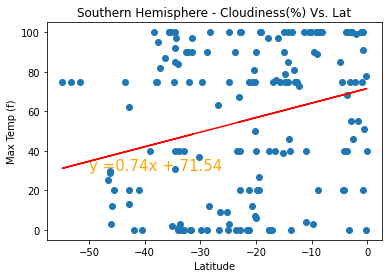

In [17]:
equation = linear_regression(southern_hem['Lat'], southern_hem['Cloudiness'])

annotate(equation, -50, 30)

plt.title('Southern Hemisphere - Cloudiness(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/southern_hemisphere_cloudiness_vs_Lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: -0.02


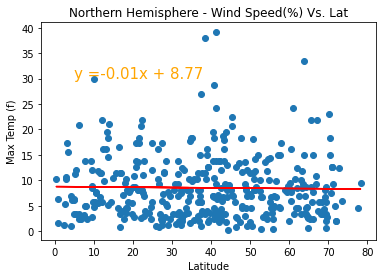

In [18]:
equation = linear_regression(northern_hem['Lat'], northern_hem['Wind Speed'])

annotate(equation, 5, 30)

plt.title('Northern Hemisphere - Wind Speed(%) Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/northern_hemisphere_wind_speed_vs_Lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: -0.23


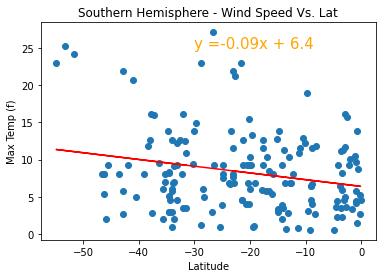

In [19]:
equation = linear_regression(southern_hem['Lat'], southern_hem['Wind Speed'])

annotate(equation, -30, 25)

plt.title('Southern Hemisphere - Wind Speed Vs. Lat')

plt.xlabel('Latitude')

plt.ylabel('Max Temp (f)')

plt.savefig('output_data/southern_hemisphere_wind_speed_vs_Lat.png')